Sherry Zhang
3/15/22

Forest Fire Analysis

Does the temperature of California affect how many wildfires occur?
Does the amount of rainfall/drought affect the amount of wildfires?
Is there a correlation between the amount of earthquakes and wildfires?

Datasets:
fire.csv - includes large amount of data that is helpful as well (start/end date, how many acres burned)

spi.csv - drought info through SPI (# of standard deviations that rainfall deviates from average) and provides categories that amount of land fall into, which allows us to see how much land is in drought
temp.csv - provides a lot of data on average temperature per month - can do use for more analysis
earthquakes.csv - has specific dates for each earthquake so we can compare

Cleaning up data:

Overall reformat everything to have standardized labels

Fire data - remove object ID (no use), state (all from California, unnecessary), agency, unit ID, inc_num, cause, comment, report ac, c_method, objective, fire_num
    All of these columns have no use to our analysis
        Either they are irrelevant or they things like cause which are just numbers don't make sense and cannot contribute to this study

Temperature data - remove non california data
    Then remove uncertainty, state, and country data, all irrelevant to the study
    Reformat date info from year-month-date to date/year

SPI data
    Rename column 1 from 0 to SPI
    Reformat date info from d_yearmonthdate to date/year
    Add new column to dataframe to note which category has the most amount of land in it:
        ex: 54% = D0, then D0

Storm data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

#Clean fire data
fire_data = pd.read_csv('Data/fire.csv')

fire_drop_columns = ['OBJECTID', 'STATE', 'AGENCY', 'UNIT_ID', 'INC_NUM', 'CAUSE', 'COMMENTS', 'REPORT_AC', 'C_METHOD', 'OBJECTIVE', 'FIRE_NUM']

#drop columns
for column in fire_drop_columns:
    del fire_data[column]

for ind in fire_data.index:
    if isinstance(fire_data['ALARM_DATE'][ind], str):
        fire_data['ALARM_DATE'][ind] = fire_data['ALARM_DATE'][ind][5:7]+'/'+fire_data['ALARM_DATE'][ind][0:4]

fire_data = fire_data.rename(columns={'ALARM_DATE':'DATE'})

print(fire_data)


C:\Users\zhangs25\AppData\Local\Temp/ipykernel_17472/2031375400.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_data['ALARM_DATE'][ind] = fire_data['ALARM_DATE'][ind][5:7]+'/'+fire_data['ALARM_DATE'][ind][0:4]


        YEAR_                       FIRE_NAME     DATE  \
0      2020.0                          NELSON  06/2020   
1      2020.0                         AMORUSO  06/2020   
2      2020.0                          ATHENS  08/2020   
3      2020.0                         FLEMING  03/2020   
4      2020.0                        MELANESE  04/2020   
5      2020.0                             PFE  07/2020   
6      2020.0                          VALLEY  07/2020   
7      2020.0                           WALDO  07/2020   
8      2020.0                          WILLOW  03/2020   
9      2020.0                         WILLOWS  09/2020   
10     2020.0                            DYER  07/2020   
11     2020.0                         FARRIER  07/2020   
12     2020.0                          FIELDS  10/2020   
13     2020.0                           JONES  08/2020   
14     2020.0                       PAVE PAWS  08/2020   
15     2020.0                           RIOSA  06/2020   
16     2020.0 

In [48]:
#Clean temperature data

#import temperature data
temp_data = pd.read_csv('Data/temp.csv')

#select only California data
temp_data = temp_data.loc[temp_data["State"] == 'California']
#Reset index to 0, 1, 2,...
temp_data.reset_index(inplace = True, drop = True)

temp_data = temp_data.rename(columns={'dt':'DATE', 'AverageTemperature':'AVGTEMP'})

#Remove unnecessary columns
temp_drop_columns = ['AverageTemperatureUncertainty', 'State', 'Country']

for column in temp_drop_columns:
    del temp_data[column]

for ind in temp_data.index:
    temp_data['DATE'][ind] = temp_data['DATE'][ind][5:7]+'/'+temp_data['DATE'][ind][0:4]

print(temp_data)

C:\Users\zhangs25\AppData\Local\Temp/ipykernel_17472/4051045233.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['DATE'][ind] = temp_data['DATE'][ind][5:7]+'/'+temp_data['DATE'][ind][0:4]


         DATE  AVGTEMP
0     01/1849    5.591
1     02/1849    6.941
2     03/1849    9.731
3     04/1849   12.294
4     05/1849   14.417
5     06/1849   21.091
6     07/1849   25.556
7     08/1849   24.992
8     09/1849   20.499
9     10/1849   14.725
10    11/1849    8.506
11    12/1849    3.898
12    01/1850    4.261
13    02/1850    6.284
14    03/1850    8.171
15    04/1850   12.680
16    05/1850   16.217
17    06/1850   20.183
18    07/1850   23.411
19    08/1850   24.874
20    09/1850   21.073
21    10/1850   15.592
22    11/1850    8.356
23    12/1850    3.513
24    01/1851    5.070
25    02/1851    6.228
26    03/1851    9.357
27    04/1851   13.462
28    05/1851   16.256
29    06/1851   21.385
30    07/1851   23.417
31    08/1851   24.286
32    09/1851   20.399
33    10/1851   15.339
34    11/1851    9.166
35    12/1851    5.358
36    01/1852    5.683
37    02/1852    7.614
38    03/1852    7.970
39    04/1852   10.942
40    05/1852   16.458
41    06/1852   22.035
42    07/18

In [49]:
#Clean spi data

spi_data = pd.read_csv('Data/spi.csv')

spi_data = spi_data.rename(columns={'0': 'SPI'})
# print(spi_data)

#reformat date
for ind in spi_data.index:
    spi_data['DATE'][ind] = spi_data['DATE'][ind][6:8]+'/'+spi_data['DATE'][ind][2:6]

#Add column for dry/wet scale
dry_or_wet = []
for ind in spi_data.index:
    vals = [0,0]

    for val in range(2, 7):
        vals[0] += spi_data.iloc[ind, val]
    
    for val in range(8, 13):
        vals[1] += spi_data.iloc[ind, val]

    max_val = max(vals)

    if vals.index(max_val) == 0:
        max_val *= -1
    
    dry_or_wet.append(round(max_val, 2))

spi_data['SCALE'] = dry_or_wet
print(spi_data)


C:\Users\zhangs25\AppData\Local\Temp/ipykernel_17472/2453137192.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spi_data['DATE'][ind] = spi_data['DATE'][ind][6:8]+'/'+spi_data['DATE'][ind][2:6]


       SPI     DATE     D0    D1    D2    D3    D4     -9     W0    W1    W2  \
0      0.0  01/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
1      0.0  02/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
2      0.0  03/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
3      0.0  04/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
4      0.0  05/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
5      0.0  06/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
6      0.0  07/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
7      0.0  08/1895    0.0   0.0   0.0   0.0   0.0  100.0    0.0   0.0   0.0   
8     35.5  09/1895    2.5   0.1   0.0   0.0   0.0    0.0   62.0  29.5   4.5   
9     58.5  10/1895   40.5  18.9   5.8   4.3   2.1    0.0    1.0   0.0   0.0   
10    60.4  11/1895   39.6  15.3   3.7   1.3   0.0    0.0    0.1   0.0   0.0   
11    44.5  12/1895   55.3  22.3   5.2  

In [50]:
#Clean earthquake data

earthquake_data = pd.read_csv('Data/earthquakes.csv')

date_column = []

for ind in earthquake_data.index:
    date_list = earthquake_data['DateTime'][ind].split('/')
    date_column.append(date_list[1]+'/'+date_list[0])
        
earthquake_data['DATE'] = date_column
earthquake_data = pd.DataFrame(earthquake_data['DATE'])

print(earthquake_data)

          DATE
0      08/1967
1      08/1967
2      08/1967
3      08/1967
4      08/1967
5      08/1967
6      08/1967
7      08/1967
8      08/1967
9      08/1967
10     08/1967
11     08/1967
12     08/1967
13     08/1967
14     08/1967
15     08/1967
16     01/1968
17     01/1968
18     02/1968
19     02/1968
20     02/1968
21     03/1968
22     03/1968
23     03/1968
24     03/1968
25     03/1968
26     03/1968
27     03/1968
28     03/1968
29     03/1968
30     03/1968
31     03/1968
32     03/1968
33     03/1968
34     04/1968
35     04/1968
36     04/1968
37     04/1968
38     04/1968
39     04/1968
40     04/1968
41     04/1968
42     05/1968
43     05/1968
44     05/1968
45     05/1968
46     05/1968
47     05/1968
48     05/1968
49     05/1968
50     05/1968
51     05/1968
52     06/1968
53     06/1968
54     06/1968
55     06/1968
56     06/1968
57     06/1968
58     06/1968
59     06/1968
60     06/1968
61     06/1968
62     06/1968
63     07/1968
64     07/1968
65     07/

In [51]:
# Columns wanted: DATE, NUMFIRES, AVGTEMP, SCALE

month_fire_count = fire_data[['DATE']].copy()
month_fire_count = month_fire_count.dropna()

#Count how many fires in every month
month_fire_count['NUMFIRES'] = month_fire_count.groupby('DATE')['DATE'].transform('count')
 
#Remove duplicate columns
month_fire_count = month_fire_count.drop_duplicates(subset ="DATE")

#Add temperature data
month_fire_count = pd.merge(month_fire_count, temp_data, on='DATE')


earthquake_data['NUMEARTHQUAKES'] = earthquake_data.groupby('DATE')['DATE'].transform('count')
earthquake_data.drop_duplicates(keep='first', inplace=True)
print(earthquake_data)

#Add status data
status_data = spi_data[['DATE','SCALE']].copy()

month_fire_count = pd.merge(month_fire_count, status_data, on='DATE')

pd.set_option('display.max_rows', None)
# print(month_fire_count)


          DATE  NUMEARTHQUAKES
0      08/1967              16
16     01/1968               2
18     02/1968               3
21     03/1968              13
34     04/1968               8
42     05/1968              10
52     06/1968              11
63     07/1968               5
68     08/1968               8
76     09/1968               4
80     10/1968               9
89     11/1968               6
95     12/1968               8
103    01/1969              20
123    02/1969              25
148    03/1969              25
173    04/1969              18
191    05/1969              32
223    06/1969              37
260    07/1969              29
289    08/1969              21
310    09/1969              25
335    10/1969              37
372    11/1969              37
409    12/1969              39
448    01/1970              50
498    02/1970              41
539    03/1970              57
596    04/1970              43
639    05/1970              66
705    06/1970              75
780    0

        DATE  NUMFIRES  AVGTEMP  SCALE
904  01/2004         1    6.494  -39.2
341  03/1926         1   12.400 -119.9
143  02/1928         1    8.123  -60.7
147  03/1944         1    9.576  -95.2
345  05/1941         1   17.166  364.0
609  12/2003         1    6.689  113.6
276  11/1941         1   11.124  242.9
606  02/1935         1    8.193   85.0
158  11/1927         1   10.971   26.2
632  12/1950         1    9.165  134.1
605  01/1980         1    7.716  109.1
591  01/1933         1    3.631  -53.9
357  04/1942         1   11.971   85.8
168  03/1914         1   12.075  209.9
587  12/1968         1    4.616  -32.3
570  09/1930         1   18.538   17.1
562  05/1931         1   18.944 -202.1
359  06/1942         1   19.948   88.7
525  04/1928         1   12.414  -53.2
164  01/1943         1    6.456  124.8
634  03/1956         1    9.951  130.1
340  09/1925         1   18.020  -35.0
657  11/1973         1    9.124   81.7
734  01/1963         1    4.854 -174.9
729  11/1962         1   

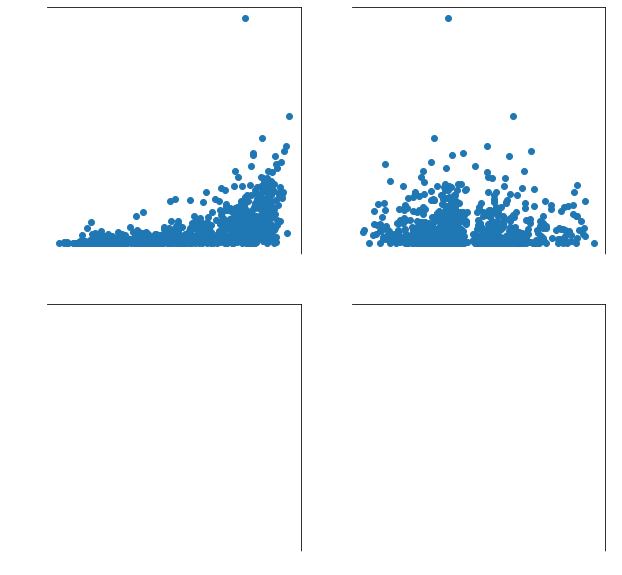

In [52]:
figure, ax = plt.subplots(2, 2)

figure.set_size_inches(10, 10)

#Plot temperature vs. number of fires
month_fire_count.sort_values(by=['NUMFIRES'], axis=0,inplace=True)
print(month_fire_count)

ax[0][0].scatter(month_fire_count['AVGTEMP'],month_fire_count['NUMFIRES'])

ax[0][0].set_xlabel("Average Temperature (C)")
ax[0][0].set_ylabel("Number of Fires")

#Plot dry scale vs number of fires
ax[0][1].scatter(month_fire_count['SCALE'],month_fire_count['NUMFIRES'])

ax[0][1].set_xlabel("Scale (the smaller the number, the more arid the land)")
ax[0][1].set_ylabel("Number of Fires")



for row in range(0,2):
    for column in range(0,2):
        ax[row][column].spines['bottom'].set_color('white')
        ax[row][column].xaxis.label.set_color('white')
        ax[row][column].tick_params(axis='x', colors='white')
        ax[row][column].spines['left'].set_color('white')
        ax[row][column].yaxis.label.set_color('white')
        ax[row][column].tick_params(axis='y', colors='white')

plt.show()